In [1]:
import json
import pandas as pd

In [2]:
json_data = []
with open('cadets.json', 'r') as f:
    for line in f:
        json_data += json.loads(line)
del line
del f

In [3]:
# json_data[0]
print(len(json_data))

344


In [ ]:
# print(type(json_data[0][1]))
# for key in json_data[0][0]:
# 	print(key)

In [ ]:
keys = ["login", "url", "displayname", "pool_month", "pool_year"]
list1 = [json_data[0][key] for key in keys]
print(list1)

In [ ]:
list_t = json_data[0]["cursus_users"][1]
list1.append(list_t["blackholed_at"])
print(list1)
for i in range(0, len(list1)):
	print(type(list1[i]))

In [6]:
def make_data(json_list: list, now: int) -> pd.DataFrame:
	data = {"Name": [], "Full_Name": [], "Level": [],
			"batch_month": [], "batch_year": [], 
			"blackhole_date": []}#, "days_before_blackhole": []}
	for i in range(0, len(json_list)):
		data["Name"].append(json_list[i]["login"])
		data["Full_Name"].append(json_list[i]["displayname"])
		data["batch_month"].append(json_list[i]["pool_month"])
		data["batch_year"].append(json_list[i]["pool_year"])
		data["Level"].append(json_list[i]["cursus_users"][1]["level"])
		data["blackhole_date"].append(json_list[i]["cursus_users"][1]["blackholed_at"])
	return (pd.DataFrame(data))

In [7]:
df = make_data(json_data, 5)
df.head()

,Name,Full_Name,Level,batch_month,batch_year,blackhole_date
0,wehuang,Weizheng Huang,0.61,august,2023,2024-02-18T02:00:00.000Z
1,rteoh,Ryan Teoh,0.00,august,2023,2024-01-01T02:00:00.000Z
2,ychai,Yong Kang Chai,0.00,august,2023,2024-01-01T02:00:00.000Z
3,tjun-yu,Tan Jun Yu,0.00,august,2023,2024-01-01T02:00:00.000Z
4,kiloh,Kian Feng Loh,0.00,august,2023,2024-01-01T02:00:00.000Z


In [8]:
from datetime import datetime

def str_date(s: str, format: str) -> datetime:
	if (s == None):
		return (None)
	s = s[0: 10]
	print(s)
	return (datetime.strptime(s, format))

In [9]:
now = datetime.now()
print(f"{now = }")

now = datetime.datetime(2023, 10, 8, 14, 58, 20, 30206)


In [10]:
print(len(df['blackhole_date']))
for i in range(0, len(df['blackhole_date']) - 1):
	if (df['blackhole_date'][i] == None):
		print(f"{i = }")
	elif (len(df['blackhole_date'][i]) > 24):
		print('something')
print(df.iloc[214, :])

344
i = 170
i = 214
i = 218
i = 227
i = 237
i = 284
i = 285
i = 287
i = 289
i = 298
i = 299
i = 303
i = 308
i = 330
i = 339
Name                   edlim
Full_Name         Edison Lim
Level                  10.83
batch_month         february
batch_year              2022
blackhole_date          None
Name: 214, dtype: object


In [ ]:
print(type(df['blackhole_date'][213]))
print(df['blackhole_date'][213])
t = str_date(df['blackhole_date'][213], "%Y-%m-%d")
print(f"{t = }")

In [ ]:
now = datetime.now()
delta = t - now
print((t - now).days)
print(type(delta.days))

In [11]:
from datetime import datetime

def str_date(s: str) -> datetime:
	if (s == None):
		return (None)
	format = "%Y-%m-%d"
	s = s[0: 10]
	return (datetime.strptime(s, format))

In [14]:
def make_data(json_list: list, now: datetime) -> pd.DataFrame:
	data = {"Name": [], "Full_Name": [], "Level": [],
			"batch_month": [], "batch_year": [], 
			"blackhole_date": [], "days_before_blackhole": [], "status": []}
	for i in range(0, len(json_list)):
		data["Name"].append(json_list[i]["login"])
		data["Full_Name"].append(json_list[i]["displayname"])
		data["batch_month"].append(json_list[i]["pool_month"])
		data["batch_year"].append(json_list[i]["pool_year"])
		data["Level"].append(json_list[i]["cursus_users"][1]["level"])
		t = str_date(json_list[i]["cursus_users"][1]["blackholed_at"])
		if (t):
			diff = (t - now).days
		else:
			diff = None
		data["blackhole_date"].append(t)
		data["days_before_blackhole"].append(diff)
		grade = json_list[i]['cursus_users'][1]['grade']
		if (diff is None and grade in ["Member", "Learner"]):
			data["status"].append("Specialisation")
		elif (diff < 0 and grade not in ["Member", "Learner"]):
			data["status"].append("Dropped out")
		elif (diff > 0 and grade in ["Member", "Learner"]):
			data["status"].append("In Core")
		else:
			data["status"].append("Unknown")
	return (pd.DataFrame(data))

In [15]:
df = make_data(json_data, datetime.now())
df.head()

,Name,Full_Name,Level,batch_month,batch_year,blackhole_date,days_before_blackhole,status
0,wehuang,Weizheng Huang,0.61,august,2023,2024-02-18,132.0,In Core
1,rteoh,Ryan Teoh,0.00,august,2023,2024-01-01,84.0,In Core
2,ychai,Yong Kang Chai,0.00,august,2023,2024-01-01,84.0,In Core
3,tjun-yu,Tan Jun Yu,0.00,august,2023,2024-01-01,84.0,In Core
4,kiloh,Kian Feng Loh,0.00,august,2023,2024-01-01,84.0,In Core


(array([4., 0., 5.]), array([ 0,  7, 14, 30]), <a list of 3 Patch objects>)

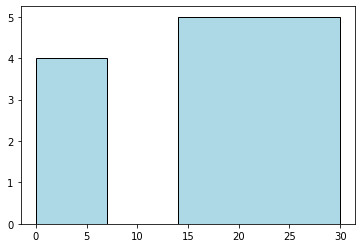

In [16]:
from matplotlib import pyplot as plt

# try to filter ppl from batch 2020 august and those how are 
# 0-14, 14-30, 30+

bins = [0, 7, 14, 30]
temp = df.loc[(df['batch_month'] == "august" ) & (df['batch_year'] == "2022") & (df['days_before_blackhole'] > 0)]
temp.head()
# color_list=['black', 'red', 'green', 'blue', 'cyan']
# colours = []
# l = len(color_list)
# k = 0 
# for i in range(0, len(bins)):
# 	colours.append(color_list[i - k])
# 	if (i == l - 1):
# 		k += 5
# print(colours)
plt.hist(temp['days_before_blackhole'], bins=bins, color="lightblue", edgecolor='black')

([<matplotlib.patches.Wedge at 0x24ef9838a00>,
 [Text(0.9829959026438434, 0.49367910162920164, 'one week 14.8%'),
  Text(0.6568744447537899, 0.8823355165861797, 'two week 0.0%'),
  Text(0.06395932512941854, 1.0981389733221336, 'one month 18.5%'),
  Text(-0.5499999702695119, -0.9526279613277874, 'many 66.7%')])

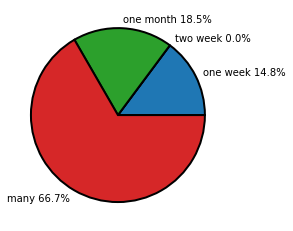

In [24]:
range = [0, 7, 14, 30]
temp = df.loc[(df['batch_month'] == "august" ) & (df['batch_year'] == "2022") & (df['days_before_blackhole'] > 0)]
max = temp['days_before_blackhole'].count()
one_wk = temp.query("days_before_blackhole > 0 and days_before_blackhole <= 7")['days_before_blackhole'].count()
two_wk = temp.query("days_before_blackhole > 7 and days_before_blackhole <= 14")['days_before_blackhole'].count()
one_mon = temp.query("days_before_blackhole > 14 and days_before_blackhole <= 30")['days_before_blackhole'].count()
many = temp.query("days_before_blackhole > 30")['days_before_blackhole'].count()
l = [one_wk, two_wk, one_mon, many]
my_labels = [f"one week {(one_wk/max * 100):.1f}%", f"two week {(two_wk/max * 100):.1f}%", f"one month {(one_mon/max * 100):.1f}%", f"many {(many/max * 100):.1f}%"]
plt.pie(l, labels=my_labels, wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True})
plt.savefig('pie.png', bbox_inches='tight')

In [ ]:
def filter_range_df(df: pd.DataFrame, key_word: str, min: int, max: int) -> pd.DataFrame:
	if (key_word is None):
		return (df)
	if (min is None and max is None):
		return (df)
	if (min is not None and max is not None):
		q = f"{key_word} >= {min} and {key_word} < {max}"
	elif (min is None and max is not None):
		q = f"{key_word} < {max}"
	else:#if (min is not ):
		q = f"{key_word} >= {min}"
	return (df.query(q))


In [ ]:
def filter_df_find(df: pd.DataFrame, key_word: str, item: str):
	if (key_word is None):
		return (df)
	if (item is None):
		return (df)
	return (df.query(f"{key_word} == '{item}'"))

In [ ]:
print(df.batch_month.unique())

In [ ]:
df2 = filter_df_find(df, "batch_month", "april")
df2 = filter_df_find(df2, "batch_year", "2021")
df2 = filter_range_df(df2, "days_before_blackhole", 20, 70)
df2.head()

In [ ]:
def make_data_state(json_list: list, now: datetime) -> pd.DataFrame:
	data = {"Name": [], "Full_Name": [], "Level": [],
			"batch_month": [], "batch_year": [], 
			"blackhole_date": [], "days_before_blackhole": [], "status": []}
	for i in range(0, len(json_list[0])):
		data["Name"].append(json_list[0][i]["login"])
		data["Full_Name"].append(json_list[0][i]["displayname"])
		data["batch_month"].append(json_list[0][i]["pool_month"])
		data["batch_year"].append(json_list[0][i]["pool_year"])
		data["Level"].append(json_list[0][i]["cursus_users"][1]["level"])
		t = str_date(json_list[0][i]["cursus_users"][1]["blackholed_at"])
		if (t):
			diff = (t - now).days
		else:
			diff = None
		data["blackhole_date"].append(t)
		data["days_before_blackhole"].append(diff)
		grade = json_list[0][i]['cursus_users'][1]['grade']
		if (diff is None and grade in ["Member", "Learner"]):
			data["status"].append("Specialisation")
		elif (diff < 0 and grade not in ["Member", "Learner"]):
			data["status"].append("Dropped out")
		elif (diff > 0 and grade in ["Member", "Learner"]):
			data["status"].append("In Core")
		else:
			data["status"].append("Unknown")
	return (pd.DataFrame(data))

In [ ]:
def make_cadet_progress(json_list: list) -> pd.DataFrame:
	data = {"Name": [], "Full_Name": [], "Level": [],
			"batch_month": [], "batch_year": [], "projects": []}
	subdata = {}
	names = ["42cursus-libft", "42cursus-get_next_line", "born2beroot", "42cursus-ft_printf",
		  	 "42cursus-push_swap", "minitalk", "pipex", "so_long", "42cursus-fdf", 
			 "42cursus-philosophers", "42cursus-minishell", "cpp-module-00", "cpp-module-01", 
			 "cpp-module-02", "cpp-module-03", "cpp-module-04", "cub3d", "minirt", "netpractice",
			 "cpp-module-05", "cpp-module-06", "cpp-module-07", "cpp-module-08", "cpp-module-09",
			 "inception", "webserv", "ft_irc", "ft_transcendence"]
	for name in names:
		data[name] = []
	for i in range(0, len(json_list)):
		data["Name"].append(json_list[i]["login"])
		data["Full_Name"].append(json_list[i]["displayname"])
		data["batch_month"].append(json_list[i]["pool_month"])
		data["batch_year"].append(json_list[i]["pool_year"])
		data["Level"].append(json_list[i]["cursus_users"][1]["level"])
		l = json_list[i]["projects_users"]
		for j in range(0, len(l)):
			checker = {names[k]:0 for k in range(len(names))}
			start = str_date(l[j]["created_at"])
			if (l[j]['validated?'] == True):
				end = str_date(l[j]["marked_at"])
			else:
				end = None
			name = l[j]["project"]["slug"]
			if (name in names):
				data[name].append([start, end, l[j]['final_mark']])
				checker[name] = 1
			for name in checker:
				if (checker[name] == 0):
					data[name].append(None)
		print(len(data["batch_month"]))
		print(len(data['42cursus-libft']))
	return(pd.DataFrame(data))

In [ ]:
df_time = make_cadet_progress(json_data)
df_time.head()

In [ ]:
# for i in range(0, len(json_data)):
# for key in json_data[0]:
# 	print(key)
print(type(json_data))
print(len(json_data))
print(type(len(json_data)))
print(json_data[1]['projects_users'])
print(type(json_data[1]))

In [ ]:
print(len(json_data[0]["projects_users"]))
print(json_data[0]["projects_users"][0]["project"]["slug"])
print(json_data[0]["projects_users"][0]["marked_at"])
print(json_data[0]["projects_users"][0]["created_at"])
print(json_data[0]["projects_users"][0]["final_mark"])